In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

# Model - basic

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

now i will create new variable to save all performace reviews and create plot with this data

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0913 - accuracy: 0.0942 - val_loss: 0.0909 - val_accuracy: 0.1026
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.1063 - val_loss: 0.0904 - val_accuracy: 0.1140
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.1176 - val_loss: 0.0900 - val_accuracy: 0.1272
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.1344 - val_loss: 0.0897 - val_accuracy: 0.1460
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.1574 - val_loss: 0.0893 - val_accuracy: 0.1719
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0892 - accuracy: 0.1834 - val_loss: 0.0890 - val_accuracy: 0.1957
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0888 - accuracy: 0.2115 - val_loss: 0.0887 - val_accuracy: 0.2290
Epoch 

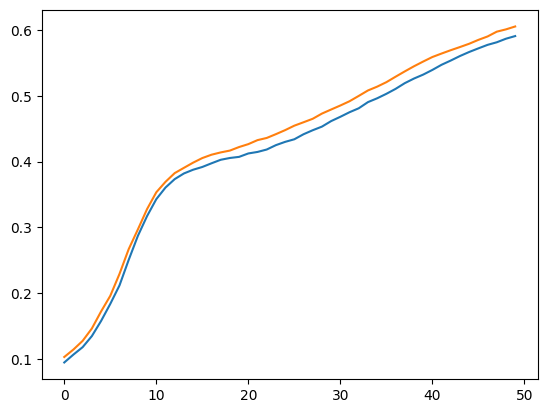

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

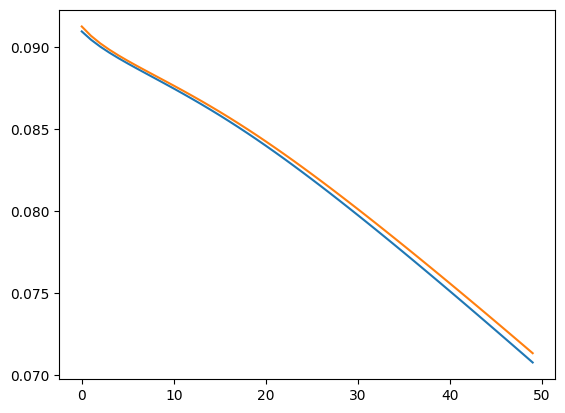

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

# Plots
Thanks to what we had learned at our laboratory classes, we now can create graphs to see the progress of our model better. Using this methods we can learn to see where is a problem or where we can improve model. 

In [ ]:
model.evaluate(
    X_train,
    y_train,
    batch_size=128,
    verbose=1,
)

469/469 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.5935


[0.0710720494389534, 0.5935166478157043]

# Evaluation
On our laboaratories (and lecture a day earlier) we learnd about new way to study deep models - evaluation. Thanks to evaluation we can provide a systematic process to undersdand how well this model achive its goals. Using this thing we can provide better solutions and improve this model - it will really help in the future.

In [ ]:
model.predict(
    X_valid,
    batch_size=128,
    verbose=1,
)

79/79 [==============================] - 0s 2ms/step


array([[0.07697862, 0.07129934, 0.07243855, ..., 0.2746983 , 0.05912429,
        0.11435439],
       [0.12271073, 0.15447967, 0.13663723, ..., 0.05717251, 0.05913807,
        0.05004282],
       [0.04270511, 0.4220626 , 0.0629376 , ..., 0.08853243, 0.0498999 ,
        0.04935125],
       ...,
       [0.02590133, 0.08389395, 0.08614573, ..., 0.1305144 , 0.09377293,
        0.1703461 ],
       [0.08670525, 0.16573356, 0.09783567, ..., 0.11290548, 0.08731756,
        0.07239623],
       [0.21162388, 0.04873057, 0.16191894, ..., 0.06508965, 0.0598137 ,
        0.05553937]], dtype=float32)

#Predictions
Not anything suprising, we use prediction to predict the output.

In [ ]:
labels = [str(digit) for digit in range(10)]

In [ ]:
predict = model.predict(X_valid, batch_size=128, verbose=1)

79/79 [==============================] - 0s 2ms/step


In [ ]:
y_predicted = np.array(np.argmax(predict, axis = 1))

In [ ]:
y_valid_predict = np.array(np.argmax(y_valid, axis =1))

In [ ]:
full_cm = confusion_matrix(y_valid_predict, y_predicted)

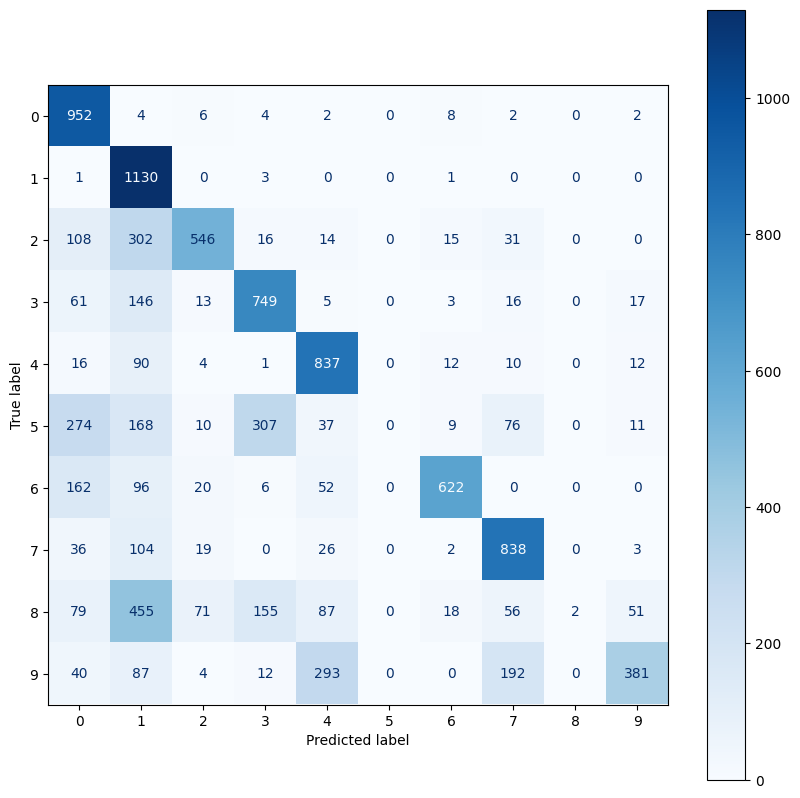

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)

#Confusion Matrix
The last thing we did on our laboratories was learning a way to create confusion matrix - graphic way to represent the differences between predicted and real outputs. In this case we can see some imperfections - our goal is to get as much as possible dark on diagonal. This would mean our model predicted everything. Now I will fit a model more to see the output here.

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.5961 - val_loss: 0.0703 - val_accuracy: 0.6094
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0704 - accuracy: 0.5994 - val_loss: 0.0698 - val_accuracy: 0.6127
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0699 - accuracy: 0.6032 - val_loss: 0.0693 - val_accuracy: 0.6159
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.6068 - val_loss: 0.0688 - val_accuracy: 0.6192
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.6096 - val_loss: 0.0683 - val_accuracy: 0.6224
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.6129 - val_loss: 0.0678 - val_accuracy: 0.6263
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.6163 - val_loss: 0.0673 - val_accuracy: 0.6278
Epoch 

In [ ]:
predict = model.predict(X_valid, batch_size=128, verbose=1)

79/79 [==============================] - 0s 2ms/step


In [ ]:
y_predicted = np.array(np.argmax(predict, axis = 1))

In [ ]:
y_valid_predict = np.array(np.argmax(y_valid, axis =1))

In [ ]:
full_cm = confusion_matrix(y_valid_predict, y_predicted)

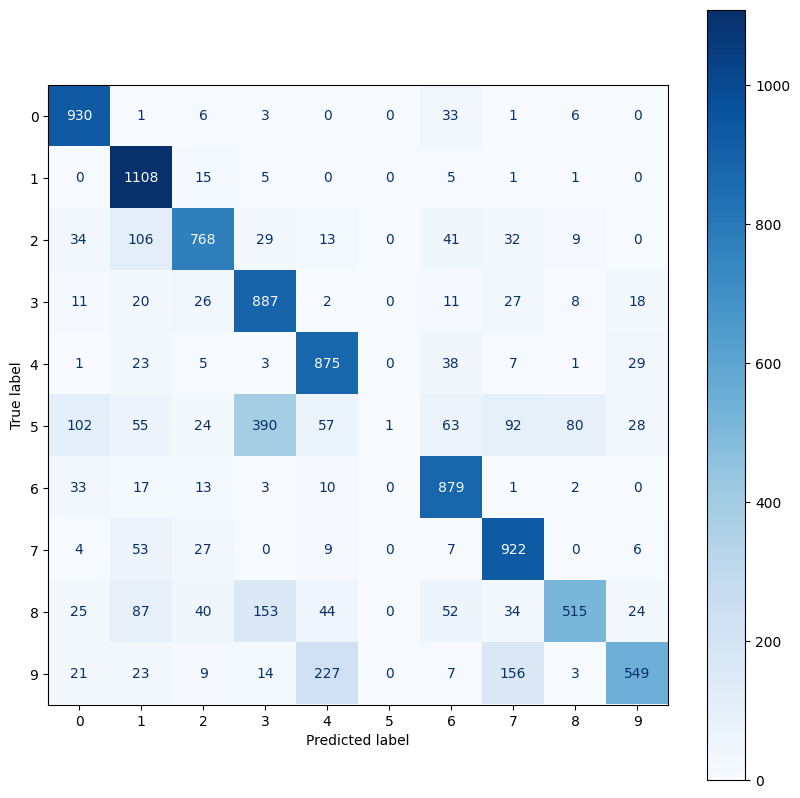

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)

Now we see that the output of matrix was more that I would like to, but I will make our more training for my model.

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.7349 - val_loss: 0.0476 - val_accuracy: 0.7461
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0481 - accuracy: 0.7369 - val_loss: 0.0473 - val_accuracy: 0.7485
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0477 - accuracy: 0.7390 - val_loss: 0.0469 - val_accuracy: 0.7498
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0474 - accuracy: 0.7412 - val_loss: 0.0465 - val_accuracy: 0.7518
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.7435 - val_loss: 0.0462 - val_accuracy: 0.7538
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0467 - accuracy: 0.7453 - val_loss: 0.0458 - val_accuracy: 0.7554
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.7470 - val_loss: 0.0455 - val_accuracy: 0.7581
Epoch 

In [ ]:
predict = model.predict(X_valid, batch_size=128, verbose=1)

79/79 [==============================] - 0s 2ms/step


In [ ]:
y_predicted = np.array(np.argmax(predict, axis = 1))

In [ ]:
y_valid_predict = np.array(np.argmax(y_valid, axis =1))

In [ ]:
full_cm = confusion_matrix(y_valid_predict, y_predicted)

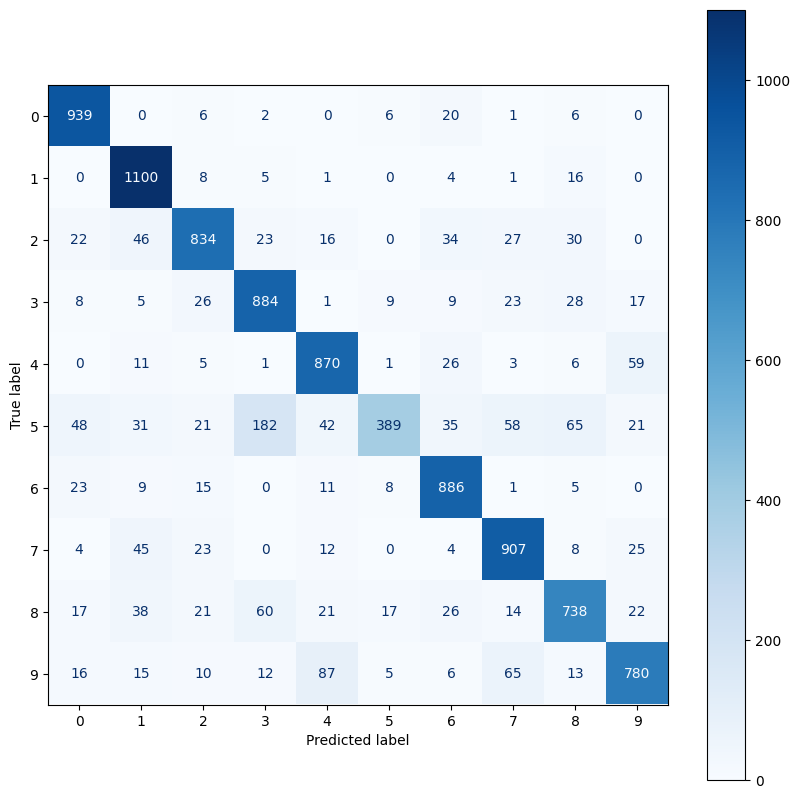

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)

the best what I got so far - I believe that in the next (or nex few) training I would get singular values outside diagonal. 

# Conclusion
I feel like on this laboratories we learned a few ways to understand model better. Using plots, evaluation, predictions and finally cofusion matrix I can see how is my model achiving set goals. This tools, when a creator of model knows how to use them, are really usefull and I hope I will be this one of creators I mentioned in the future. 